In [97]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy import stats

In [98]:
iris_dataset = pd.read_csv("./../Dataset/Iris.csv")
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
continous_value_features = iris_dataset.loc[:,iris_dataset.dtypes != np.object0]
categorical_value_features = iris_dataset.loc[:,iris_dataset.dtypes == np.object0]

In [100]:
continous_value_features.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [101]:
categorical_value_features.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [102]:
continous_value_features.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
dtype: int64

In [103]:
categorical_value_features.count()

Species    150
dtype: int64

In [104]:
continous_value_features.mean()

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [105]:
continous_value_features.median()

Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [106]:
continous_value_features.std()

Id               43.445368
SepalLengthCm     0.828066
SepalWidthCm      0.433594
PetalLengthCm     1.764420
PetalWidthCm      0.763161
dtype: float64

In [107]:
continous_value_features.var()

Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
dtype: float64

In [108]:
categorical_value_features.mode()

,Species
0,Iris-setosa
1,Iris-versicolor
2,Iris-virginica


In [109]:
categorical_value_features.nunique()

Species    3
dtype: int64

In [110]:
categorical_feature_names = list(categorical_value_features['Species'].unique())
for feature in categorical_feature_names:
    print(feature,(categorical_value_features['Species'] == feature).sum())

Iris-setosa 50
Iris-versicolor 50
Iris-virginica 50


/home/student/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

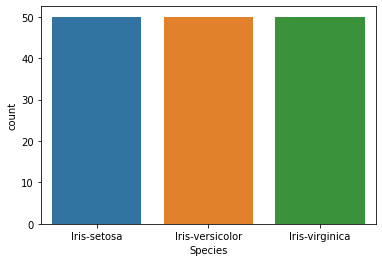

In [111]:
sns.countplot('Species',data=iris_dataset)

In [112]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [114]:
iris_dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [115]:
iris_dataset.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [116]:
iris_dataset.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [117]:
print("25 Percentile")
print(iris_dataset.quantile(0.25),"\n")
print("50 Percentile")
print(iris_dataset.quantile(0.50),"\n")
print("75 Percentile")
print(iris_dataset.quantile(0.75),"\n")
print("100 Percentile")
print(iris_dataset.quantile(1.00),"\n")

25 Percentile
Id               38.25
SepalLengthCm     5.10
SepalWidthCm      2.80
PetalLengthCm     1.60
PetalWidthCm      0.30
Name: 0.25, dtype: float64 

50 Percentile
Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
Name: 0.5, dtype: float64 

75 Percentile
Id               112.75
SepalLengthCm      6.40
SepalWidthCm       3.30
PetalLengthCm      5.10
PetalWidthCm       1.80
Name: 0.75, dtype: float64 

100 Percentile
Id               150.0
SepalLengthCm      7.9
SepalWidthCm       4.4
PetalLengthCm      6.9
PetalWidthCm       2.5
Name: 1.0, dtype: float64 



In [118]:
churn_dataset = pd.read_csv("./../Dataset/Churn_Modelling.csv")
churn_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
continous_value_features = churn_dataset.loc[:,churn_dataset.dtypes != np.object0]
categorical_value_features = churn_dataset.loc[:,churn_dataset.dtypes == np.object0]

In [120]:
continous_value_features.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [122]:
categorical_value_features.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [123]:
continous_value_features.count()

RowNumber          10000
CustomerId         10000
CreditScore        10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [124]:
categorical_value_features.count()

Surname      10000
Geography    10000
Gender       10000
dtype: int64

In [125]:
continous_value_features.mean()

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [126]:
continous_value_features.median()

RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [127]:
continous_value_features.std()

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [128]:
continous_value_features.var()

RowNumber          8.334167e+06
CustomerId         5.174815e+09
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [129]:
categorical_value_features.mode()

,Surname,Geography,Gender
0,Smith,France,Male


In [130]:
categorical_value_features.nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [131]:
geos = list(categorical_value_features['Geography'].unique())
for geo in geos:
    print(geo,(categorical_value_features['Geography'] == geo).sum())

France 5014
Spain 2477
Germany 2509


/home/student/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

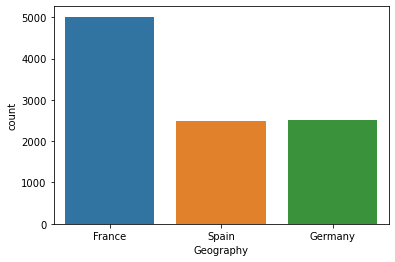

In [132]:
sns.countplot('Geography',data = churn_dataset)

In [133]:
genders = list(categorical_value_features['Gender'].unique())
for gen in genders:
    print(gen, (categorical_value_features['Gender'] == gen).sum())

Female 4543
Male 5457


/home/student/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

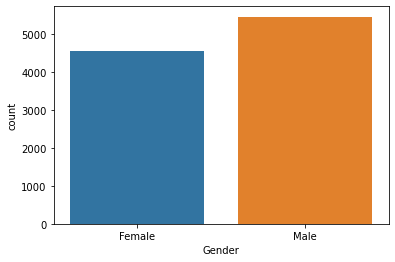

In [134]:
sns.countplot(churn_dataset['Gender'])

In [135]:
churn_dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [136]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [137]:
churn_dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [138]:
continous_value_features.min()

RowNumber                 1.00
CustomerId         15565701.00
CreditScore             350.00
Age                      18.00
Tenure                    0.00
Balance                   0.00
NumOfProducts             1.00
HasCrCard                 0.00
IsActiveMember            0.00
EstimatedSalary          11.58
Exited                    0.00
dtype: float64

In [139]:
continous_value_features.max()

RowNumber             10000.00
CustomerId         15815690.00
CreditScore             850.00
Age                      92.00
Tenure                   10.00
Balance              250898.09
NumOfProducts             4.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      199992.48
Exited                    1.00
dtype: float64

In [140]:
print("25 Percentile")
print(churn_dataset.quantile(0.25),"\n")
print("50 Percentile")
print(churn_dataset.quantile(0.50),"\n")
print("75 Percentile")
print(churn_dataset.quantile(0.75),"\n")
print("100 Percentile")
print(churn_dataset.quantile(1.00),"\n")

25 Percentile
RowNumber              2500.75
CustomerId         15628528.25
CreditScore             584.00
Age                      32.00
Tenure                    3.00
Balance                   0.00
NumOfProducts             1.00
HasCrCard                 0.00
IsActiveMember            0.00
EstimatedSalary       51002.11
Exited                    0.00
Name: 0.25, dtype: float64 

50 Percentile
RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
Name: 0.5, dtype: float64 

75 Percentile
RowNumber          7.500250e+03
CustomerId         1.575323e+07
CreditScore        7.180000e+02
Age                4.400000e+01
Tenure             7.000000e+00
Balance            1.276442e+05
NumOfProducts   

In [141]:
churn_dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

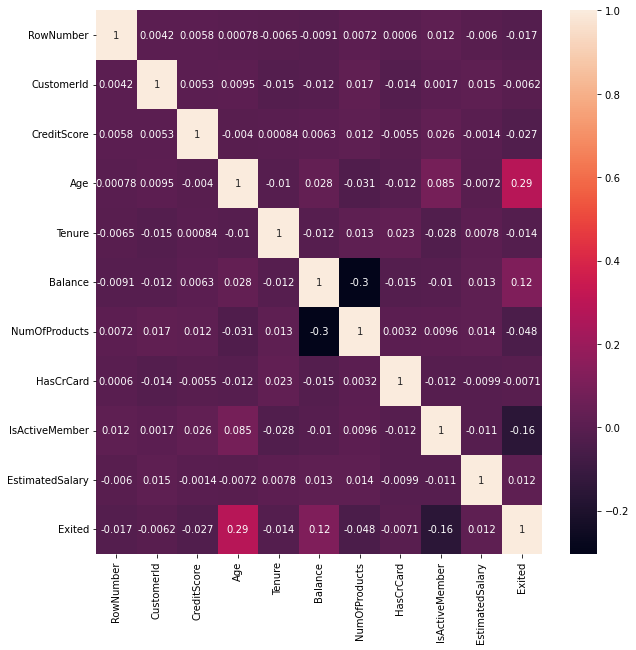

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(churn_dataset.corr(),annot=True,linecolor='black')

In [142]:
churn_dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

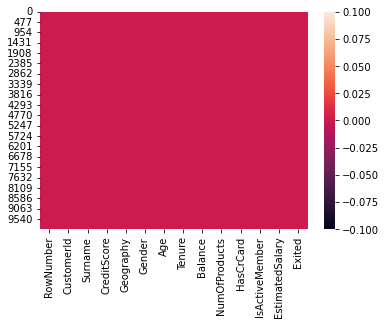

In [143]:
sns.heatmap(churn_dataset.isna())

In [144]:
surname_le = LabelEncoder()
churn_preprocessed_dataset = pd.DataFrame(surname_le.fit_transform(churn_dataset['Surname']),columns=['Surname'])
churn_preprocessed_dataset.head()
churn_dataset['Surname'] = churn_preprocessed_dataset
churn_dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [145]:
geo_le = LabelEncoder()
churn_preprocessed_dataset = pd.DataFrame(geo_le.fit_transform(churn_dataset['Geography']),columns=['Geography'])
churn_preprocessed_dataset.head()
churn_dataset['Geography'] = churn_preprocessed_dataset
churn_dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [146]:
gender_le = LabelEncoder()
churn_preprocessed_dataset = pd.DataFrame(gender_le.fit_transform(churn_dataset['Gender']),columns=['Gender'])
churn_preprocessed_dataset.head()
churn_dataset['Gender'] = churn_preprocessed_dataset
churn_dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [147]:
churn_dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [148]:
sc = StandardScaler()
scaled_churn_dataset = pd.DataFrame(sc.fit_transform(churn_dataset),columns=churn_dataset.columns)
scaled_churn_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.731878,-0.783213,-0.464183,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-1.731531,-0.606534,-0.390911,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.731185,-0.995885,0.628988,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,-1.730838,0.144767,-1.440356,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,-1.730492,0.652659,0.371354,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


In [149]:
pca = PCA(n_components=5)
churn_reduction_dataset = pd.DataFrame(pca.fit_transform(churn_dataset))
churn_reduction_dataset.head()

,0,1,2,3,4
0,52996.310317,-78278.606041,9452.334635,5021.574938,383.848052
1,43470.043463,6599.903637,13384.652202,4984.603746,327.568749
2,74587.051906,81150.776953,9657.826129,4946.581478,-534.253395
3,-13414.961299,-76270.959351,-443.171016,5032.492668,1212.826742
4,-44128.388951,48946.015823,-26566.864588,4989.133322,-316.055673


Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


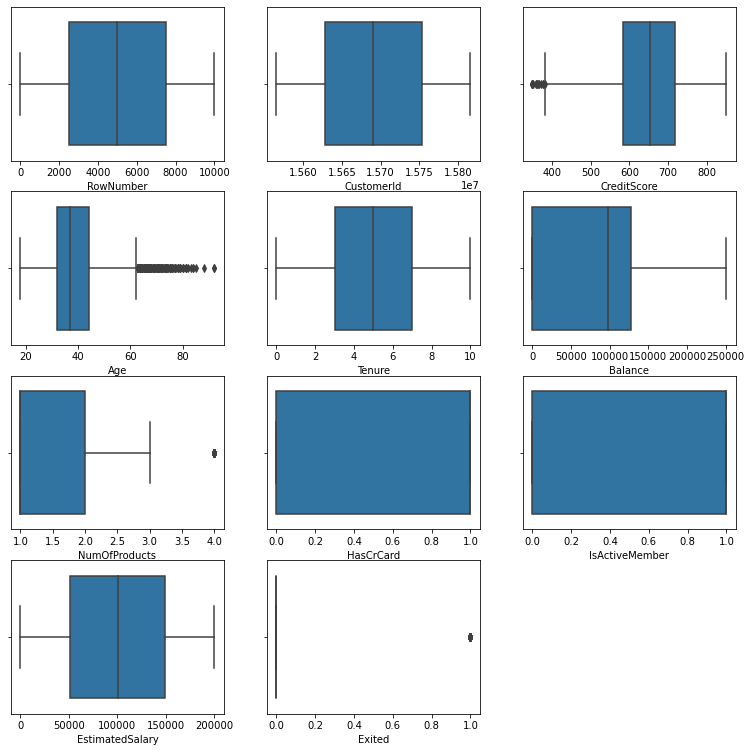

In [150]:
i = 1
plt.figure(figsize=(13,13))
print(continous_value_features.columns)
for feature in continous_value_features.columns:
    plt.subplot(4,3,i)
    i += 1
    sns.boxplot(x=feature,data=churn_dataset)

Index(['Surname', 'Geography', 'Gender'], dtype='object')


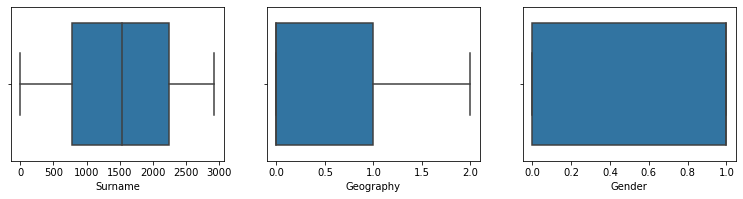

In [151]:
i = 1
plt.figure(figsize=(13,13))
print(categorical_value_features.columns)
for feature in categorical_value_features.columns:
    plt.subplot(4,3,i)
    i += 1
    sns.boxplot(x=feature,data=churn_dataset)

In [152]:
for feature in scaled_churn_dataset.columns:
    print(feature)
    a,b = stats.kstest(scaled_churn_dataset[feature],'norm')
    print("Statistics",a,"P-Value",b)
    if b < 0.05:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
        

RowNumber
Statistics 0.05725671950861355 P-Value 6.152601507636552e-29
The null hypothesis can be rejected
CustomerId
Statistics 0.05950196154772769 P-Value 3.2209102101084715e-31
The null hypothesis can be rejected
Surname
Statistics 0.06241361096227166 P-Value 2.623095521321336e-34
The null hypothesis can be rejected
CreditScore
Statistics 0.019514369097252127 P-Value 0.0009716147073086599
The null hypothesis can be rejected
Geography
Statistics 0.3178413500913032 P-Value 0.0
The null hypothesis can be rejected
Gender
Statistics 0.36492594365757575 P-Value 0.0
The null hypothesis can be rejected
Age
Statistics 0.10095678840195232 P-Value 3.492314209372659e-89
The null hypothesis can be rejected
Tenure
Statistics 0.10727987737641603 P-Value 1.1199056169918361e-100
The null hypothesis can be rejected
Balance
Statistics 0.2515719980592674 P-Value 0.0
The null hypothesis can be rejected
NumOfProducts
Statistics 0.3274059926821068 P-Value 0.0
The null hypothesis can be rejected
HasCrCard


<AxesSubplot:>

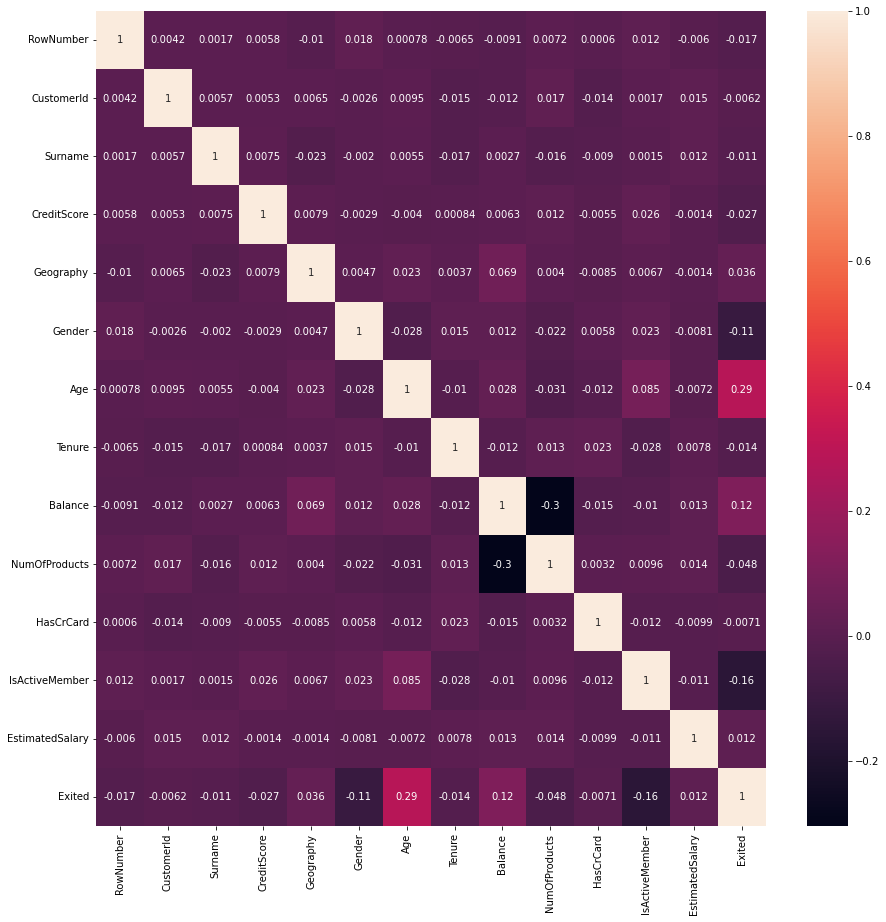

In [158]:
plt.figure(figsize=(15,15))
sns.heatmap(scaled_churn_dataset.corr(),annot=True)

In [154]:
for feature_i in scaled_churn_dataset.columns:
    for feature_j in scaled_churn_dataset.columns:
        if(feature_i != feature_j):
            print(feature_i,feature_j)
            print(stats.ttest_rel(scaled_churn_dataset[feature_i],scaled_churn_dataset[feature_j]))

RowNumber CustomerId
Ttest_relResult(statistic=-5.348794126133195e-13, pvalue=0.9999999999995732)
RowNumber Surname
Ttest_relResult(statistic=3.218096539921096e-15, pvalue=0.9999999999999974)
RowNumber CreditScore
Ttest_relResult(statistic=3.5473010048640286e-14, pvalue=0.9999999999999717)
RowNumber Geography
Ttest_relResult(statistic=0.0, pvalue=1.0)
RowNumber Gender
Ttest_relResult(statistic=-6.490096303341774e-15, pvalue=0.9999999999999949)
RowNumber Age
Ttest_relResult(statistic=-1.2866590069184987e-14, pvalue=0.9999999999999898)
RowNumber Tenure
Ttest_relResult(statistic=9.614992813560345e-15, pvalue=0.9999999999999923)
RowNumber Balance
Ttest_relResult(statistic=6.401820985924962e-15, pvalue=0.9999999999999949)
RowNumber NumOfProducts
Ttest_relResult(statistic=3.227102018068116e-15, pvalue=0.9999999999999974)
RowNumber HasCrCard
Ttest_relResult(statistic=0.0, pvalue=1.0)
RowNumber IsActiveMember
Ttest_relResult(statistic=6.469857926570563e-15, pvalue=0.9999999999999949)
RowNumber

In [155]:
for feature_i in scaled_churn_dataset.columns:
    for feature_j in scaled_churn_dataset.columns:
        if(feature_i != feature_j):
            print(feature_i,feature_j)
            print(stats.mannwhitneyu(scaled_churn_dataset[feature_i],scaled_churn_dataset[feature_j]))

RowNumber CustomerId
MannwhitneyuResult(statistic=49999739.0, pvalue=0.999490888944762)
RowNumber Surname
MannwhitneyuResult(statistic=49992321.0, pvalue=0.9849943210927065)
RowNumber CreditScore
MannwhitneyuResult(statistic=49889270.0, pvalue=0.7862184627634714)
RowNumber Geography
MannwhitneyuResult(statistic=50001593.0, pvalue=0.996856682293086)
RowNumber Gender
MannwhitneyuResult(statistic=50000314.0, pvalue=0.9993772523521819)
RowNumber Age
MannwhitneyuResult(statistic=51392655.0, pvalue=0.0006461599677706533)
RowNumber Tenure
MannwhitneyuResult(statistic=49997490.0, pvalue=0.9950926471798839)
RowNumber Balance
MannwhitneyuResult(statistic=50062030.0, pvalue=0.8788807769066073)
RowNumber NumOfProducts
MannwhitneyuResult(statistic=51047208.0, pvalue=0.00925646902804609)
RowNumber HasCrCard
MannwhitneyuResult(statistic=50000685.0, pvalue=0.998629587558369)
RowNumber IsActiveMember
MannwhitneyuResult(statistic=49997824.0, pvalue=0.9956800859700125)
RowNumber EstimatedSalary
Mannwhitn

MannwhitneyuResult(statistic=49373652.0, pvalue=0.11957800024124397)
NumOfProducts CreditScore
MannwhitneyuResult(statistic=48946572.0, pvalue=0.008847401247963262)
NumOfProducts Geography
MannwhitneyuResult(statistic=37790570.0, pvalue=2.3991911172814176e-206)
NumOfProducts Gender
MannwhitneyuResult(statistic=47208982.0, pvalue=1.7476544427141547e-12)
NumOfProducts Age
MannwhitneyuResult(statistic=49583360.0, pvalue=0.30044621266908544)
NumOfProducts Tenure
MannwhitneyuResult(statistic=50379254.0, pvalue=0.34564712080076143)
NumOfProducts Balance
MannwhitneyuResult(statistic=55776922.0, pvalue=5.156785101823865e-47)
NumOfProducts HasCrCard
MannwhitneyuResult(statistic=64132380.0, pvalue=7.244900847906698e-284)
NumOfProducts IsActiveMember
MannwhitneyuResult(statistic=50169226.0, pvalue=0.6690178889507565)
NumOfProducts EstimatedSalary
MannwhitneyuResult(statistic=48885650.0, pvalue=0.005617868574290444)
NumOfProducts Exited
MannwhitneyuResult(statistic=39810170.0, pvalue=2.44655253609